# Домашнее задание по теме: Классификация

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn scikit-learn -y

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Загрузка данных

[Gender Classification Dataset](https://www.kaggle.com/elakiricoder/gender-classification-dataset)

In [4]:
df = pd.read_csv('../../data/gender_classification_v7.csv')

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## Разделить на train/test

- Разделить данные на `y` и `X`.
- `y` - это колонка `gender`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [6]:
target_col = 'gender'
y = df[target_col].copy()
X = df.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Баланс классов

- Проверить классы `y` на сбалансированность.

<AxesSubplot:xlabel='gender', ylabel='count'>

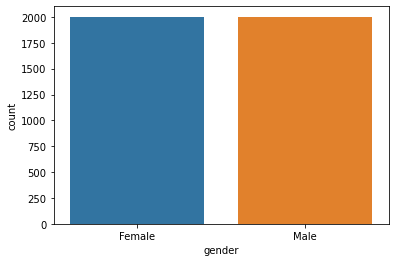

In [7]:
sns.countplot(x=y_train)

## Выбросы

- Есть ли выбросы? Каково распределение данных?
    - `hist`
    - `kde`
    - `boxplot`
- Нужно ли с этим что-то делать?

In [8]:
df_train = X_train.join(y_train)

df_num_cols = df_train.select_dtypes(include=np.number)
df_num_cols_len = len(df_num_cols.columns)

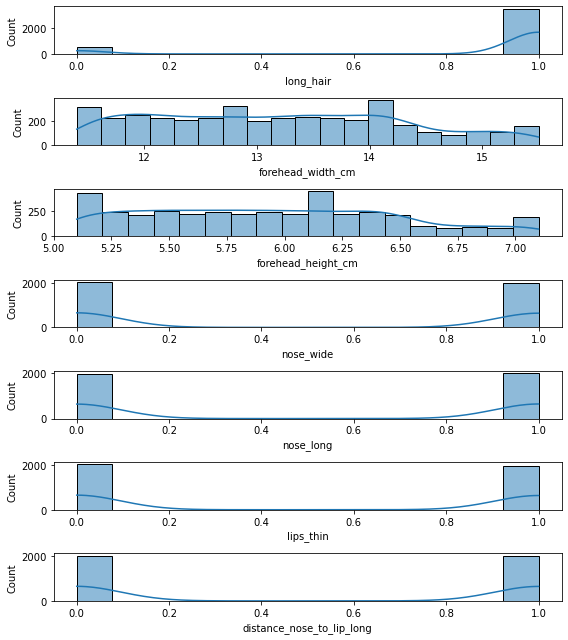

In [9]:
fig, axs = plt.subplots(df_num_cols_len, 1, figsize=(8, 9))

for index, num_col in enumerate(df_num_cols):
    sns.histplot(data=df_train[num_col], 
                 kde=True, 
                 ax=axs[index])
fig.tight_layout()

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Подсказка: в `sns.heatmap` можно указать параметры `vmin`, `vmax` для более адекватного распределения цвета.

Text(0.5, 1.0, 'Correlation Matrix of features')

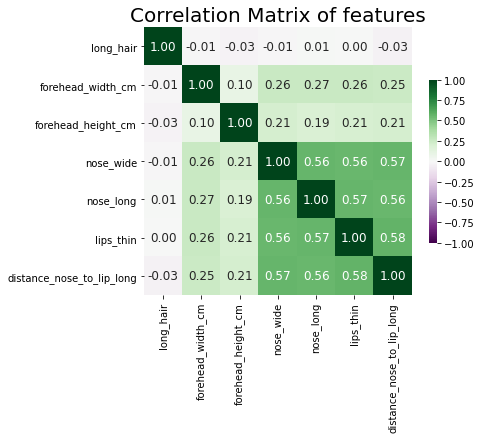

In [10]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(6, 6))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

## Эксперименты с моделями

- Можно использовать любое количество признаков.
- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Провести эксперименты на всех изученных моделях.
    - Попробовать разные модели.
    - Попробовать различные параметры `scoring` для `GridSearch`.
    - Результаты экспериментов желательно собрать в одну таблицу и по возможности визуализировать (`heatmap`, `confusion_matrix`).
- Проанализировать результаты (различные метрики). Написать выводы.

In [11]:
y_train

4778    Female
3276      Male
2253    Female
253       Male
1278      Male
         ...  
4480    Female
3951    Female
2765      Male
1205    Female
2999    Female
Name: gender, Length: 4000, dtype: object

In [12]:
y_train_enc = LabelEncoder().fit_transform(y_train)
y_train_enc

array([0, 1, 0, ..., 1, 0, 0])

In [13]:
y_test_enc = LabelEncoder().fit_transform(y_test)
y_test_enc

array([1, 1, 1, ..., 1, 0, 1])

In [14]:
num_cols = ['forehead_width_cm', 'forehead_height_cm']
bin_cols = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('passthrough', 'passthrough', bin_cols),
])

In [15]:
gs_scoring = ['roc_auc', 
              'recall', 
              'precision', 
              'f1', 
              'balanced_accuracy', 
              'accuracy']

In [16]:
models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier, 
                               {'model__max_depth': [5, 7],
                                'model__criterion': ['gini', 'entropy']}),
    
    'LogisticRegression': (LogisticRegression, 
                           {'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}),
    
    'SVC': (SVC, 
            {'model__degree': [2, 3, 4]}),
    
    'KNeighborsClassifier': (KNeighborsClassifier, 
                             {'model__n_neighbors': [4, 5, 6], 
                              'model__weights': ['uniform', 'distance']})
}

In [17]:
import time

total = len(models) * len(gs_scoring)
index = 1
experiments = {}

for name, (model, param_grid) in models.items():
    experiments[name] = {}
    for scoring in gs_scoring:
        start = time.time()
        pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model', model())
        ])
        
        print(f"{name} | {scoring} ...", end=' ')
        
        model_gs = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=scoring)
        model_gs.fit(X_train, y_train_enc)
        
        experiments[name].update({scoring: model_gs})
        end = time.time()

        print(f"finished! ({end - start:0.2f}s) {index}/{total}")
        
        print(f"best_params: {model_gs.best_params_}")
        print(f"best_score: {model_gs.best_score_:0.2f}\n")
        
        index += 1
    print('-' * 20, '\n')

DecisionTreeClassifier | roc_auc ... finished! (1.49s) 1/24
best_params: {'model__criterion': 'gini', 'model__max_depth': 5}
best_score: 0.99

DecisionTreeClassifier | recall ... finished! (0.14s) 2/24
best_params: {'model__criterion': 'gini', 'model__max_depth': 7}
best_score: 0.96

DecisionTreeClassifier | precision ... finished! (0.14s) 3/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 5}
best_score: 0.98

DecisionTreeClassifier | f1 ... finished! (0.15s) 4/24
best_params: {'model__criterion': 'gini', 'model__max_depth': 7}
best_score: 0.97

DecisionTreeClassifier | balanced_accuracy ... finished! (0.14s) 5/24
best_params: {'model__criterion': 'gini', 'model__max_depth': 7}
best_score: 0.97

DecisionTreeClassifier | accuracy ... finished! (0.14s) 6/24
best_params: {'model__criterion': 'gini', 'model__max_depth': 5}
best_score: 0.97

-------------------- 

LogisticRegression | roc_auc ... finished! (0.27s) 7/24
best_params: {'model__solver': 'newton-cg'}
best_scor

## Анализ результатов

In [18]:
columns = ['accuracy', 'b_accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [19]:
def evaluate_model(y_predicted, X_test, y_test):       
    accuracy = accuracy_score(y_test, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    roc_auc = roc_auc_score(y_test, y_predicted)
    
    return pd.Series([accuracy, balanced_accuracy, precision, recall, f1, roc_auc], 
                     index=columns)



plot matrix: 6x4


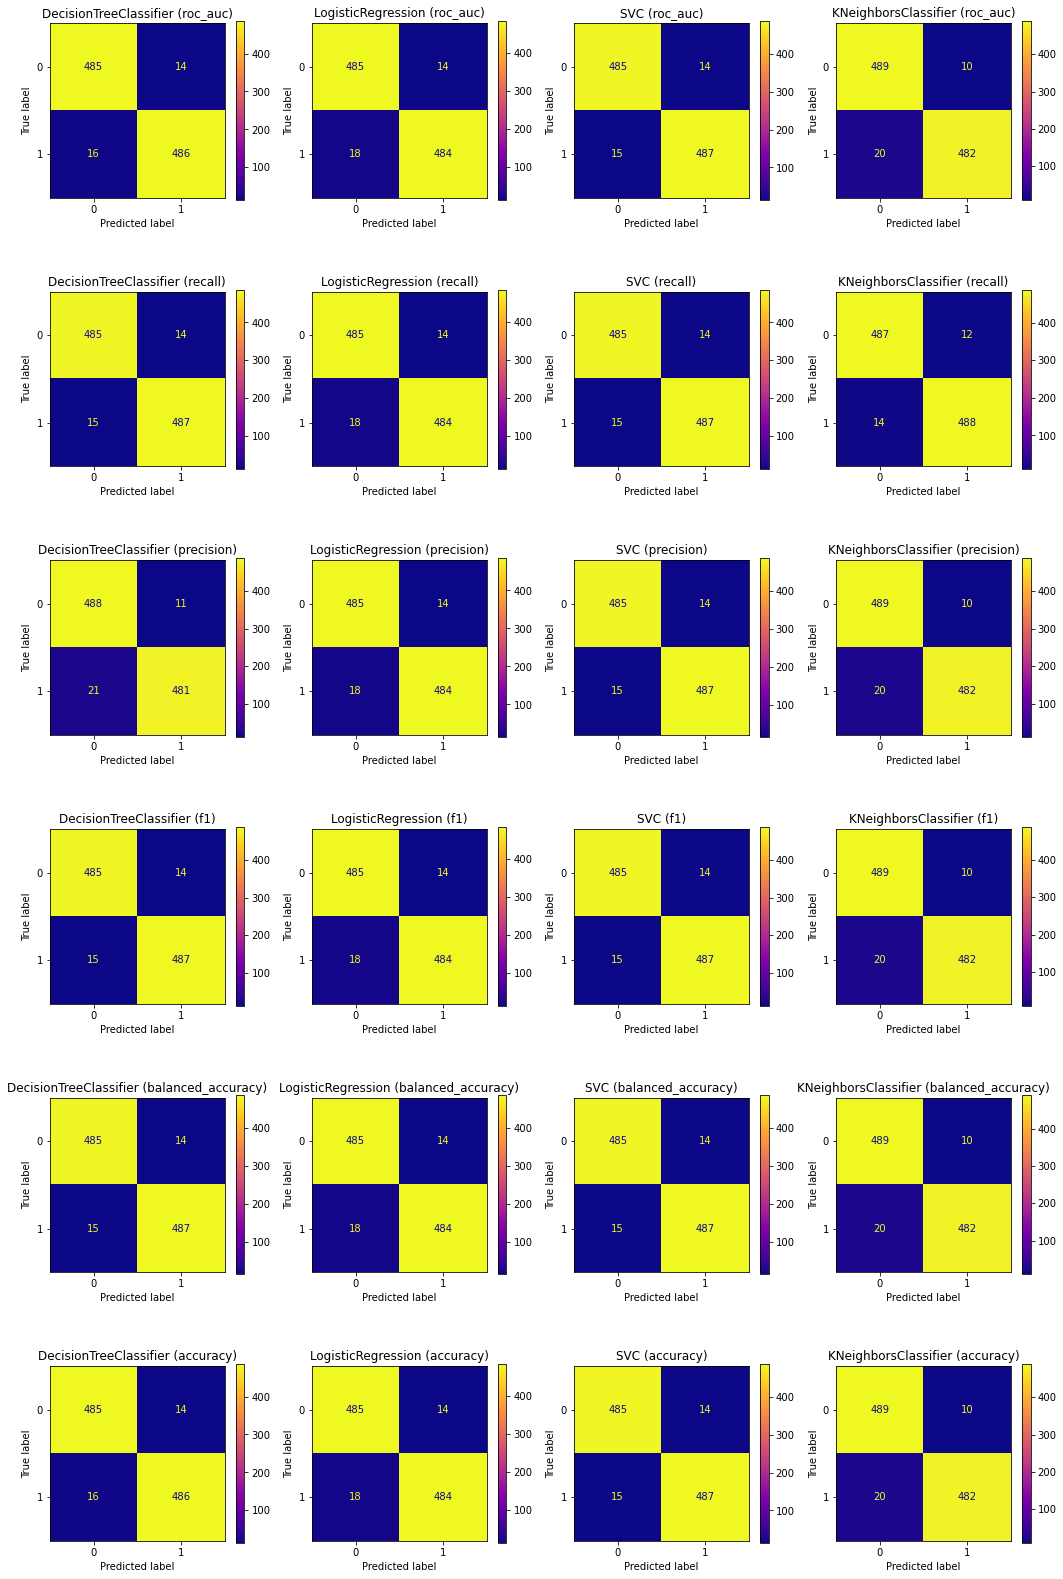

In [20]:
eval_df = pd.DataFrame(columns=columns)
name_scorer_index = []

names_len = len(models)
scorers_len = len(gs_scoring)
fig, axes = plt.subplots(scorers_len, names_len, figsize=(scorers_len*3, names_len*7))

for name_index, (name, models_by_scorer) in enumerate(experiments.items()):
    for scorer_index, (scorer, model) in enumerate(models_by_scorer.items()):
        name_scorer_index.append((name, scorer))

        y_predicted = model.predict(X_test)
        ax=axes[scorer_index][name_index]
        plot_confusion_matrix(model, X_test, y_test_enc, ax=ax, cmap='plasma')
        ax.set_title(f'{name} ({scorer})')
        
        eval_res = evaluate_model(y_predicted, X_test, y_test_enc)        
        eval_df = eval_df.append(eval_res, ignore_index=True)
        
index = pd.MultiIndex.from_tuples(name_scorer_index, names=["name", "scorer"])
eval_df.set_index(index, inplace=True)

print(f'\n\nplot matrix: {scorers_len}x{names_len}')

# расстояние между графиками по горизонтали и вертикали
fig.subplots_adjust(hspace=0.5, wspace=0.2)

In [21]:
eval_df

accuracy  b_accuracy  precision  \
name                   scorer                                               
DecisionTreeClassifier roc_auc            0.970030    0.970036   0.972000   
                       recall             0.971029    0.971032   0.972056   
                       precision          0.968032    0.968062   0.977642   
                       f1                 0.971029    0.971032   0.972056   
                       balanced_accuracy  0.971029    0.971032   0.972056   
                       accuracy           0.970030    0.970036   0.972000   
LogisticRegression     roc_auc            0.968032    0.968044   0.971888   
                       recall             0.968032    0.968044   0.971888   
                       precision          0.968032    0.968044   0.971888   
                       f1                 0.968032    0.968044   0.971888   
                       balanced_accuracy  0.968032    0.968044   0.971888   
                       accuracy           0.968032    0.968044   0.971888   
SVC                    roc_auc            0.971029    0.971032   0.972056   
                       recall             0.971029    0.971032   0.972056   
                       precision          0.971029    0.971032   0.972056   
                       f1                 0.971029    0.971032   0.972056   
                       balanced_accuracy  0.971029    0.971032   0.972056   
                       accuracy           0.971029    0.971032   0.972056   
KNeighborsClassifier   roc_auc            0.970030    0.970060   0.979675   
                       recall             0.974026    0.974032   0.976000   
                       precision          0.970030    0.970060   0.979675   
                       f1                 0.970030    0.970060   0.979675   
                       balanced_accuracy  0.970030    0.970060   0.979675   
                       accuracy           0.970030    0.970060   0.979675   

                                            recall        f1   roc_auc  
name                   scorer                                           
DecisionTreeClassifier roc_auc            0.968127  0.970030  0.970036  
                       recall             0.970120  0.971029  0.971032  
                       precision          0.958167  0.968030  0.968062  
                       f1                 0.970120  0.971029  0.971032  
                       balanced_accuracy  0.970120  0.971029  0.971032  
                       accuracy           0.968127  0.970030  0.970036  
LogisticRegression     roc_auc            0.964143  0.968032  0.968044  
                       recall             0.964143  0.968032  0.968044  
                       precision          0.964143  0.968032  0.968044  
                       f1                 0.964143  0.968032  0.968044  
                       balanced_accuracy  0.964143  0.968032  0.968044  
                       accuracy           0.964143  0.968032  0.968044  
SVC                    roc_auc            0.970120  0.971029  0.971032  
                       recall             0.970120  0.971029  0.971032  
                       precision          0.970120  0.971029  0.971032  
                       f1                 0.970120  0.971029  0.971032  
                       balanced_accuracy  0.970120  0.971029  0.971032  
                       accuracy           0.970120  0.971029  0.971032  
KNeighborsClassifier   roc_auc            0.960159  0.970028  0.970060  
                       recall             0.972112  0.974026  0.974032  
                       precision          0.960159  0.970028  0.970060  
                       f1                 0.960159  0.970028  0.970060  
                       balanced_accuracy  0.960159  0.970028  0.970060  
                       accuracy           0.960159  0.970028  0.970060

In [22]:
eval_df.min()

accuracy      0.968032
b_accuracy    0.968044
precision     0.971888
recall        0.958167
f1            0.968030
roc_auc       0.968044
dtype: float64

In [26]:
min_val = eval_df.min().min()
max_val = eval_df.max().max()
min_val, max_val

(0.9581673306772909, 0.9796747967479674)

<AxesSubplot:ylabel='name-scorer'>

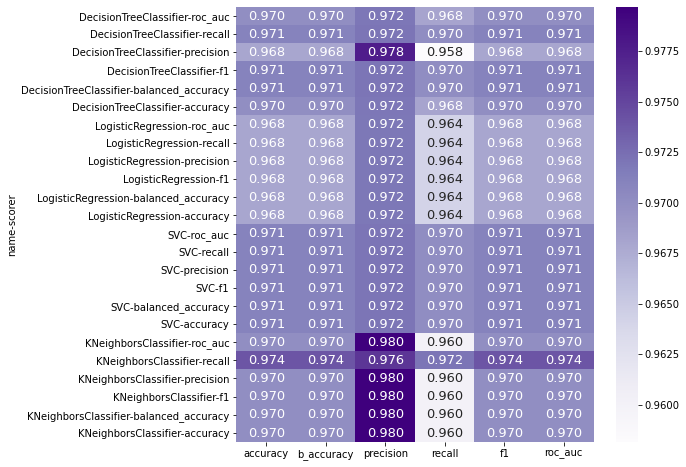

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(eval_df, 
            annot=True, 
            annot_kws={"size": 13}, 
            fmt="1.3f", 
            cmap='Purples', 
            vmin=min_val, 
            vmax=max_val)

## Сохранение лучшей модели

In [25]:
import joblib

joblib.dump(experiments['DecisionTreeClassifier']['recall'], './tmp/example_model_dtc_recall.joblib')

['./tmp/example_model_dtc_recall.joblib']